# Core gene vs essential gene

[Poulsen et al.](https://www.pnas.org/doi/10.1073/pnas.1900570116) published a study identifying and characterizing essential (i.e. critical for the organism's survival) core genes. Here we want to compare the 321 essential genes identified compared to our most stable core set of genes.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import textwrap
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
from scripts import paths, utils, annotations

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Load data

In [2]:
# Input similarity scores
our_similarity_filename = "all_core_similarity_associations_final_spell.tsv"

# Downloaded supplemental table S6
published_essential_filename = "pnas_1900570116_sd06.csv"

In [3]:
# Import df
our_similarity = pd.read_csv(our_similarity_filename, sep="\t", index_col=0, header=0)
published_essential = pd.read_csv(published_essential_filename, index_col=0, header=0)

In [4]:
print(our_similarity.shape)
our_similarity.head()

(5347, 27)


,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,mean expression_pao1,standard deviation expression_pao1,min expression_pao1,25% expression_pao1,50% expression_pao1,...,standard deviation expression_p14,25% expression_p14,50% expression_p14,75% expression_p14,min expression_p14,max expression_p14,variance expression_p14,range expression_p14,pathways present_p14,Related acc genes_p14
PA0118,PA14_01440,0.290443,1.771504e-104,NaN,NaN,84.379666,87.012773,0.000000,30.805250,56.083433,...,80.368739,23.079151,38.107897,57.933632,0.000000,662.245143,6.459134e+03,662.245143,[],NaN
PA1859,PA14_40440,0.143328,5.986934e-26,NaN,NaN,106.687908,91.482549,0.000000,50.280627,78.021322,...,57.028168,51.071843,72.575326,105.626428,0.000000,400.928716,3.252212e+03,400.928716,[],NaN
PA3190,PA14_22980,0.257508,9.170620e-82,NaN,NaN,2974.728597,4619.591491,0.000000,477.708748,1386.138060,...,5428.865874,682.520390,2268.790469,5222.390596,0.000000,77365.371337,2.947258e+07,77365.371337,['path:pau02010 : ABC transporters'],NaN
PA1009,PA14_51280,0.549950,0.000000e+00,NaN,NaN,448.628362,387.755818,18.128903,238.075927,370.338444,...,282.615721,170.776065,274.443598,462.828788,13.871988,2095.679114,7.987165e+04,2081.807126,[],NaN
PA1065,PA14_50620,0.329633,9.188709e-136,NaN,NaN,105.604816,85.534956,0.000000,47.418993,82.907779,...,86.037792,40.856930,74.832672,115.490996,3.104826,1253.535657,7.402502e+03,1250.430831,[],NaN


In [5]:
print(published_essential.shape)
published_essential.head()

(864, 7)


,PA14_ID (for reference),Gene description (PATRIC),Turner K.H. et al 2015,Lee S.A. et al 2015,Skurnik D. et al 2013,Liberati N.T. et al 2006,This study
Cluster_ID,,,,,,,
5262.0,PA14_00010,Chromosomal replication initiator protein DnaA,E,E,E,E,E
5558.0,PA14_00020,DNA polymerase III beta subunit (EC 2.7.7.7),E,E,E,NaN,E
8557.0,PA14_00050,DNA gyrase subunit B (EC 5.99.1.3),E,E,E,NaN,E
3198.0,PA14_00070,Histidinol-phosphatase (EC 3.1.3.15),NaN,E,NaN,NaN,E
8031.0,PA14_00090,Glycyl-tRNA synthetase beta chain (EC 6.1.1.14),E,E,E,E,E


In [6]:
# Essential genes are only those with an E in the "This study"
published_essential = published_essential[published_essential["This study"] == "E"]

# Check that there are 321 genes
print(published_essential.shape)
published_essential.head()

(321, 7)


,PA14_ID (for reference),Gene description (PATRIC),Turner K.H. et al 2015,Lee S.A. et al 2015,Skurnik D. et al 2013,Liberati N.T. et al 2006,This study
Cluster_ID,,,,,,,
5262.0,PA14_00010,Chromosomal replication initiator protein DnaA,E,E,E,E,E
5558.0,PA14_00020,DNA polymerase III beta subunit (EC 2.7.7.7),E,E,E,NaN,E
8557.0,PA14_00050,DNA gyrase subunit B (EC 5.99.1.3),E,E,E,NaN,E
3198.0,PA14_00070,Histidinol-phosphatase (EC 3.1.3.15),NaN,E,NaN,NaN,E
8031.0,PA14_00090,Glycyl-tRNA synthetase beta chain (EC 6.1.1.14),E,E,E,E,E


## Compare most stable core genes vs core essential genes

In [7]:
# Get most stable core genes
most_stable_core = our_similarity.loc[
    our_similarity["label"] == "most stable", "PA14 homolog id"
]

In [8]:
print(len(most_stable_core))
most_stable_core

267


PA0955    PA14_51910
PA1802    PA14_41230
PA4946    PA14_65350
PA3795    PA14_14990
PA3981    PA14_12330
             ...    
PA4273    PA14_08730
PA1673    PA14_42860
PA4348    PA14_56540
PA3742    PA14_16000
PA3836    PA14_14390
Name: PA14 homolog id, Length: 267, dtype: object

In [9]:
# Get core essential genes
pub_core_essential = published_essential["PA14_ID (for reference)"]

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


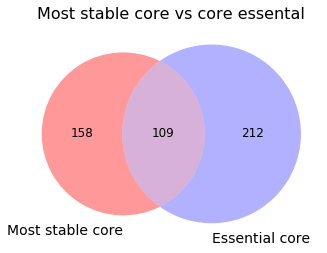

In [10]:
# Compare
most_stable_venn = venn2(
    [set(most_stable_core), set(pub_core_essential)],
    set_labels=("Most stable core", "Essential core"),
)

most_stable_venn.get_patch_by_id("11").set_color("purple")
most_stable_venn.get_patch_by_id("11").set_edgecolor("none")
most_stable_venn.get_patch_by_id("11").set_alpha(0.3)
most_stable_venn.get_patch_by_id("01").set_color("blue")
most_stable_venn.get_patch_by_id("01").set_edgecolor("none")
most_stable_venn.get_patch_by_id("01").set_alpha(0.3)

plt.title("Most stable core vs core essental", fontsize=16, fontname="Verdana")
for text in most_stable_venn.set_labels:
    text.set_fontsize(14)
    text.set_fontname("Verdana")

for text in most_stable_venn.subset_labels:
    text.set_fontsize(12)
    text.set_fontname("Verdana")

In [11]:
# % of core essential genes that are most stable
109 / 267

0.40823970037453183